In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-56b175d2-4745-00df-85a6-43f6475460dc)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-22 14:51:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-22 14:51:20 (108 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

## Downloading data with Tensorflow Datasets

Downloaded data is already in form of tensors

In [ ]:
import tensorflow_datasets as tfds
dataset_lists = tfds.list_builders()
"food101" in dataset_lists

True

In [ ]:
# Load in the data (takes about 5-6 minutes in Google Colab)
(train_data, test_data), ds_info = tfds.load(name="food101", # target dataset to get from TFDS
                                             split=["train", "validation"], # what splits of data should we get? note: not all datasets have train, valid, test
                                             shuffle_files=True, # shuffle files on download?
                                             as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                             with_info=True) # include dataset metadata? if so, tfds.load() returns tuple (data, ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteO8L6G4/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteO8L6G4/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
class_names = ds_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
train_one_sample = train_data.take(1)

In [ ]:
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 16
  Class name (str form): cheesecake
        


In [ ]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 85,  84,  92],
        [ 86,  85,  93],
        [ 93,  92, 100],
        ...,
        [120, 196, 245],
        [120, 198, 246],
        [121, 199, 247]],

       [[ 88,  88,  96],
        [ 82,  82,  90],
        [ 88,  88,  96],
        ...,
        [116, 192, 244],
        [118, 195, 249],
        [119, 196, 248]],

       [[ 77,  80,  89],
        [ 75,  78,  87],
        [ 82,  86,  95],
        ...,
        [115, 189, 252],
        [117, 192, 255],
        [118, 194, 255]],

       ...,

       [[159, 166, 194],
        [154, 161, 187],
        [171, 178, 204],
        ...,
        [219, 216, 235],
        [223, 220, 239],
        [227, 226, 244]],

       [[170, 179, 208],
        [169, 179, 206],
        [173, 183, 210],
        ...,
        [218, 217, 235],
        [223, 222, 240],
        [226, 227, 245]],

       [[168, 177, 206],
        [170, 179, 208],
        [152, 162, 189],
        ...,
        [224, 223, 24

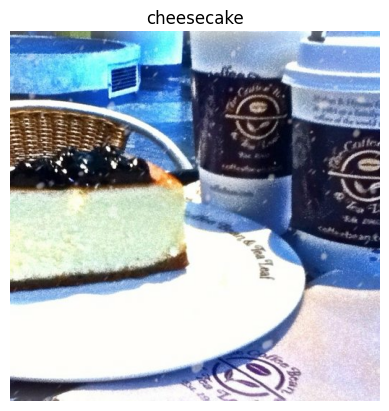

In [ ]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()]) # add title to image by indexing on class_names list
plt.axis(False);

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
    return tf.cast(image, dtype =tf.float32), label # return (float32_image, label) tuple

In [ ]:
import tensorflow as tf

preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[ 85  84  92]
  [ 86  85  93]
  [ 93  92 100]
  ...
  [120 196 245]
  [120 198 246]
  [121 199 247]]

 [[ 88  88  96]
  [ 82  82  90]
  [ 88  88  96]
  ...
  [116 192 244]
  [118 195 249]
  [119 196 248]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[ 84.67857   84.321434  92.321434]
  [ 87.19898   86.841835  94.841835]
  [ 84.72959   84.581635  94.72449 ]
  ...
  [119.50503  194.93877  245.85202 ]
  [114.974525 190.97452  241.90309 ]
  [119.071465 196.4286   247.82652 ]]

 [[ 75.647964  84.21939   93.21939 ]
  [ 71.45407   80.959175  89.959175]
  [ 78.03061   87.20408   97.47449 ]
  ...
  [113.31632  182.62755  249.35715 ]
  [106.57655  176.86227  245.4337  ]
  [108.601944 179.9796   248.16833 ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


In [ ]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf
# Create TensorBoard callback (already have "create_tensorboard_callback()" from a previous notebook)
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved

In [ ]:
# Turn on mixed precision training
import tensorflow as tf
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

In [ ]:
import tensorflow as tf

# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [ ]:
from tensorflow.keras import layers

base_model= tf.keras.applications.EfficientNetB6(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape=(224,224,3),name ="input_layer")
x = base_model(inputs,training = False)
x = layers.GlobalAveragePooling2D(name= "global_average_pooling_layer")(x)
x = layers.Dense(101)(x) # want one output neuron per class
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)

model = tf.keras.Model(inputs,outputs)

model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

27018416/27018416 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 6,704,620
Trainable params: 129,381
Non-trainab

In [ ]:
for layer in model.layers[1].layers[:20]: # check only the first 20 layers to save printing space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1b_dwconv False float32 <Polic

In [ ]:
for layer in model.layers[1].layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1b_dwconv False float32 <Polic

* layer.name (str) : a layer's human-readable name, can be defined by the name parameter on construction
* **layer.trainable (bool)** : whether or not a layer is trainable (all of our layers are trainable except the efficientnetb0 layer since we set it's trainable attribute to False
* **layer.dtype** : the data type a layer stores its variables in
* **layer.dtype_policy** : the data type a layer computes in

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20230722-150446
Epoch 1/3
2368/2368 [==============================] - 224s 86ms/step - loss: 1.6904 - accuracy: 0.5832 - val_loss: 1.1200 - val_accuracy: 0.6976
Epoch 2/3
2368/2368 [==============================] - 203s 84ms/step - loss: 1.1777 - accuracy: 0.6934 - val_loss: 1.0429 - val_accuracy: 0.7129
Epoch 3/3
2368/2368 [==============================] - 204s 84ms/step - loss: 1.0294 - accuracy: 0.7295 - val_loss: 1.0027 - val_accuracy: 0.7254


In [ ]:
result_1 = model.evaluate(test_data)
result_1

790/790 [==============================] - 60s 76ms/step - loss: 1.0140 - accuracy: 0.7219


[1.0139542818069458, 0.7218613624572754]

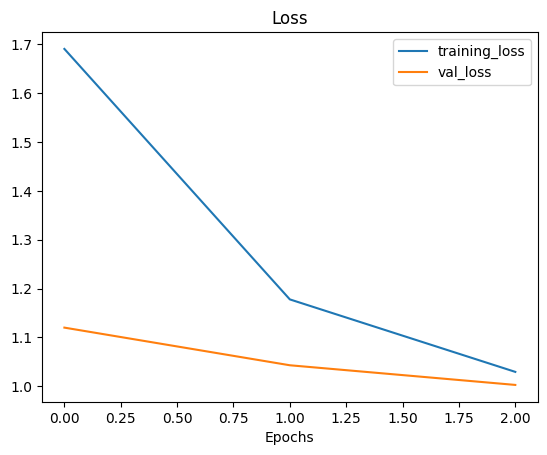

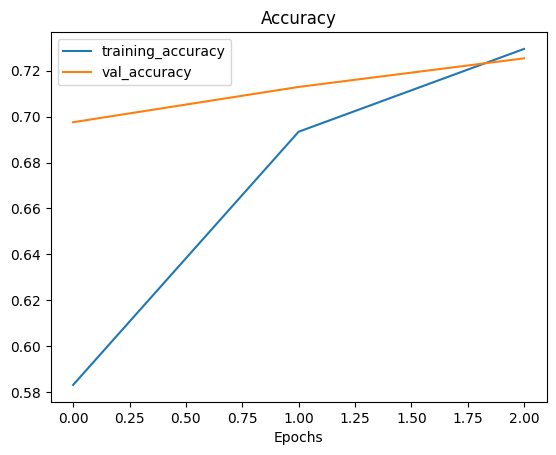

In [ ]:
plot_loss_curves(history_101_food_classes_feature_extract)

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_se_reduce F

In [ ]:
print(len(model.trainable_variables))

12


In [ ]:
initial_epoch = 3
fine_tune_epochs = initial_epoch + 3

history_fine_tune_1 = model.fit(train_data,epochs = fine_tune_epochs,
                                steps_per_epoch = len(train_data),
                                validation_data=test_data,
                                validation_steps = int(0.15*len(test_data)),
                                initial_epoch=history_101_food_classes_feature_extract.epoch[-1],
                                callbacks = [create_tensorboard_callback("training_logs","fine_tune_1")])

Saving TensorBoard log files to: training_logs/fine_tune_1/20230722-151642
Epoch 3/6
2368/2368 [==============================] - 222s 87ms/step - loss: 0.8445 - accuracy: 0.7751 - val_loss: 0.9116 - val_accuracy: 0.7492
Epoch 4/6
2368/2368 [==============================] - 211s 88ms/step - loss: 0.6774 - accuracy: 0.8197 - val_loss: 0.9049 - val_accuracy: 0.7497
Epoch 5/6
2368/2368 [==============================] - 203s 84ms/step - loss: 0.5393 - accuracy: 0.8579 - val_loss: 0.9041 - val_accuracy: 0.7519
Epoch 6/6
2368/2368 [==============================] - 212s 88ms/step - loss: 0.4223 - accuracy: 0.8911 - val_loss: 0.9322 - val_accuracy: 0.7484


In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 60s 75ms/step - loss: 0.9439 - accuracy: 0.7463


[0.9439204335212708, 0.7462574243545532]

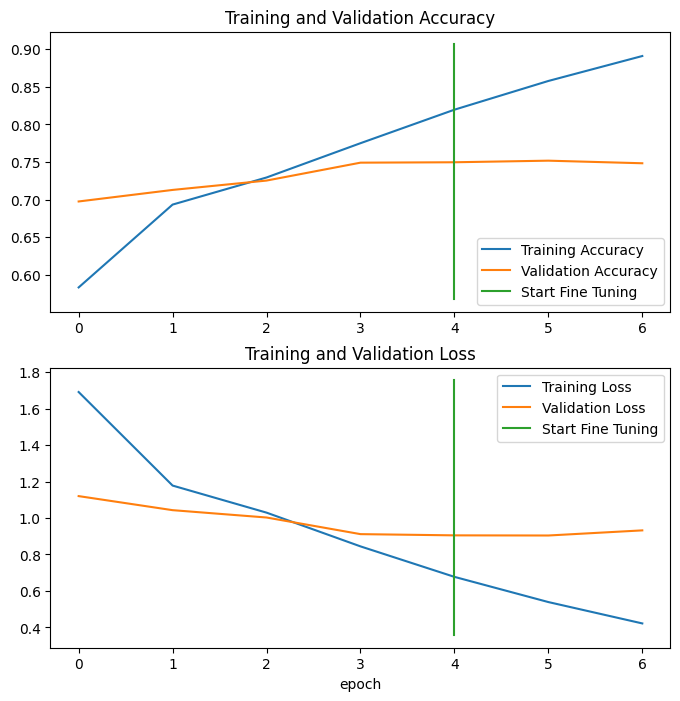

In [ ]:
compare_historys(history_101_food_classes_feature_extract,history_fine_tune_1)

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-15]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
model.load_weights("model_checkpoints/cp.ckpt")

In [ ]:
initial_epoch = 3
fine_tune_epochs = initial_epoch + 3

history_fine_tune_2 = model.fit(train_data,epochs = fine_tune_epochs,
                                steps_per_epoch = len(train_data),
                                validation_data=test_data,
                                validation_steps = int(0.15*len(test_data)),
                                initial_epoch=history_101_food_classes_feature_extract.epoch[-1],
                                callbacks = [create_tensorboard_callback("training_logs","fine_tune_2")])

Saving TensorBoard log files to: training_logs/fine_tune_2/20230722-153356
Epoch 3/6
2368/2368 [==============================] - 232s 91ms/step - loss: 1.2790 - accuracy: 0.6664 - val_loss: 0.9325 - val_accuracy: 0.7418
Epoch 4/6
2368/2368 [==============================] - 229s 96ms/step - loss: 0.7812 - accuracy: 0.7844 - val_loss: 0.9143 - val_accuracy: 0.7548
Epoch 5/6
2368/2368 [==============================] - 244s 102ms/step - loss: 0.5706 - accuracy: 0.8391 - val_loss: 0.9576 - val_accuracy: 0.7434
Epoch 6/6
2368/2368 [==============================] - 208s 87ms/step - loss: 0.4106 - accuracy: 0.8824 - val_loss: 0.9791 - val_accuracy: 0.7495


#Model 2 (with data augmentation)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.RandomHeight(0.1),
  layers.RandomWidth(0.1),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

In [ ]:
from tensorflow.keras import layers

base_model= tf.keras.applications.EfficientNetB1(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape=(224,224,3),name ="input_layer")
x = data_augmentation(inputs)
x = base_model(x,training = False)
x = layers.GlobalAveragePooling2D(name= "global_average_pooling_layer")(x)
x = layers.Dense(101)(x) # want one output neuron per class
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)

model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history_model_2_feature = model_2.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "model_2_feature_extraction"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/model_2_feature_extraction/20230722-160935
Epoch 1/3
2368/2368 [==============================] - 398s 161ms/step - loss: 1.9727 - accuracy: 0.5183 - val_loss: 1.2178 - val_accuracy: 0.6666
Epoch 2/3
2368/2368 [==============================] - 223s 93ms/step - loss: 1.4770 - accuracy: 0.6217 - val_loss: 1.1622 - val_accuracy: 0.6801
Epoch 3/3
2368/2368 [==============================] - 212s 88ms/step - loss: 1.3496 - accuracy: 0.6497 - val_loss: 1.1103 - val_accuracy: 0.6920


In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-15]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

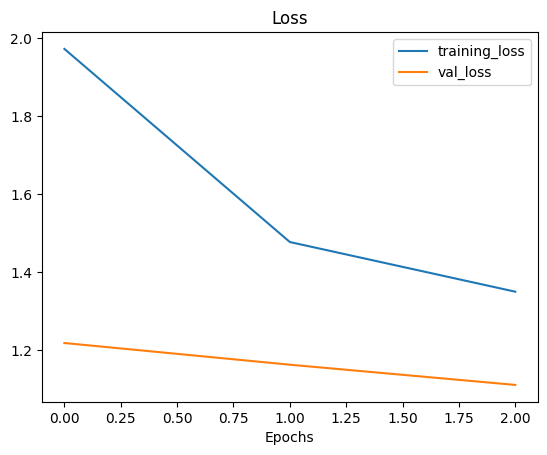

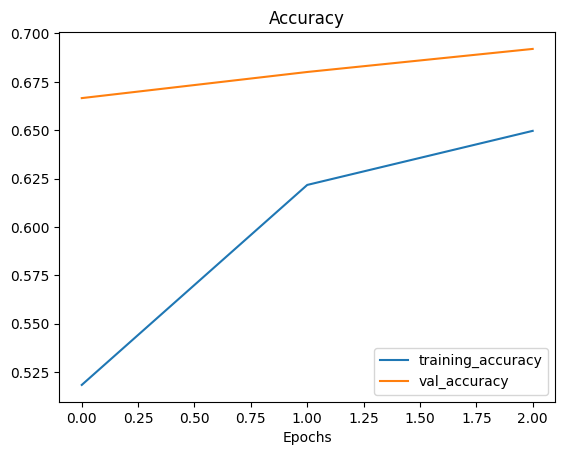

In [ ]:
plot_loss_curves(history_model_2_feature)

In [ ]:
initial_epoch = 3
fine_tune_epochs = initial_epoch + 3

history_fine_tune_2 = model_2.fit(train_data,epochs = fine_tune_epochs,
                                steps_per_epoch = len(train_data),
                                validation_data=test_data,
                                validation_steps = int(0.15*len(test_data)),
                                initial_epoch=history_101_food_classes_feature_extract.epoch[-1],
                                callbacks = [create_tensorboard_callback("training_logs","model_2_fine_tune")])

Saving TensorBoard log files to: training_logs/model_2_fine_tune/20230722-162852
Epoch 3/6
2368/2368 [==============================] - 209s 87ms/step - loss: 1.2652 - accuracy: 0.6677 - val_loss: 1.0993 - val_accuracy: 0.6944
Epoch 4/6
2368/2368 [==============================] - 205s 85ms/step - loss: 1.2123 - accuracy: 0.6794 - val_loss: 1.1162 - val_accuracy: 0.6928
Epoch 5/6
2368/2368 [==============================] - 205s 85ms/step - loss: 1.1723 - accuracy: 0.6885 - val_loss: 1.1052 - val_accuracy: 0.6904
Epoch 6/6
2368/2368 [==============================] - 207s 86ms/step - loss: 1.1404 - accuracy: 0.6948 - val_loss: 1.1125 - val_accuracy: 0.6920
